<ipython-input-1-1c041f812226>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-1-1c041f812226>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


Mean Squared Error: 312.5426936014286
R^2 Score: 0.5173426575045997


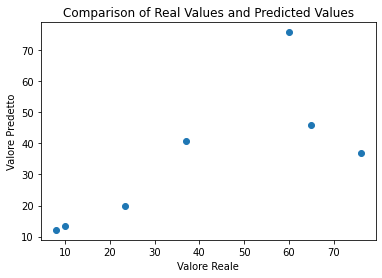

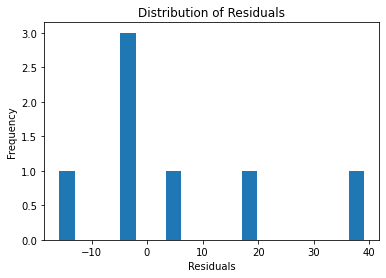

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Valore Reale')
plt.ylabel('Valore Predetto')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Create a table with the test data details, real value, and predicted value
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]




In [2]:
# Decode categorical variables in the results table
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column]
# Calculate the difference column between predicted value and real value
results['Differenza'] = results['Valore Predetto'] - results['Valore Reale']
print(results)
results.to_csv('JUVE3.csv', index=False)

   club_name   age  player_name  position  club_involved_name  season  \
0          0  30.0            5         0                   2    2020   
1          3  25.0            3         3                   2    2019   
2          2  28.0            1         3                   3    2019   
3          2  24.0            0         2                   0    2020   
4          1  20.0            4         0                   2    2020   
5          1  19.0            2         1                   2    2020   
6          2  19.0            6         2                   1    2020   

   Valore Reale  Valore Predetto  Differenza  
0          60.0          75.7765     15.7765  
1          65.0          46.0012    -18.9988  
2          37.0          40.9225      3.9225  
3          76.0          36.9879    -39.0121  
4          10.0          13.3431      3.3431  
5           8.0          12.1650      4.1650  
6          23.3          19.8225     -3.4775  


Mean Squared Error: 897.4947378999748
R^2 Score: -0.3859944064180407


<ipython-input-5-2fc7a6473046>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-5-2fc7a6473046>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


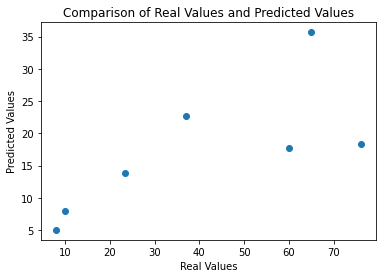

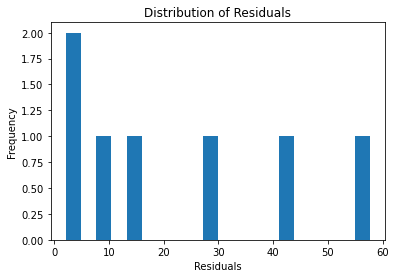

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Real Value  Predicted Value  Difference  
0           Juventus    2020        60.0        17.735252  -42.264748  
1           Juventus    2019        65.0        35.664714  -29.335286  
2    Manchester City    2019        37.0        22.744926  -14.255074  
3          Barcelona    2020        76.0        18.286220  -57.713780  
4           Juventus    2020        10.0         7.889356   -2.110644  
5           Juventus    2020         8.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Create a table with the test data details, real value, and predicted value
results = X_test.copy()
results['Real Value'] = y_test
results['Predicted Value'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Real Value', 'Predicted Value']]

# Decode categorical variables in the results table
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column] = decoded_values


# Calculate the difference column between predicted value and real value
results['Difference'] = results['Predicted Value'] - results['Real Value']
print(results)



<ipython-input-6-bc8f4b33c9c0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-6-bc8f4b33c9c0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


Mean Squared Error: 799.8478826106638
R^2 Score: -0.2351990986349881


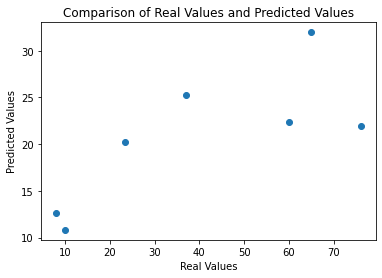

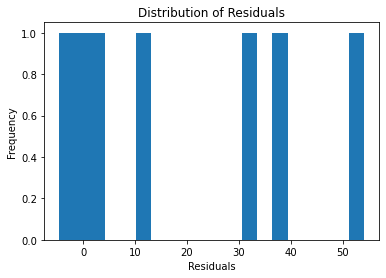

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Real Value  Predicted Value  Difference  
0           Juventus    2020        60.0        22.378179  -37.621821  
1           Juventus    2019        65.0        31.980481  -33.019519  
2    Manchester City    2019        37.0        25.223131  -11.776869  
3          Barcelona    2020        76.0        21.934259  -54.065741  
4           Juventus    2020        10.0        10.821814    0.821814  
5           Juventus    2020         8.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Create a table with the test data details, real value, and predicted value
results = X_test.copy()
results['Real Value'] = y_test
results['Predicted Value'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Real Value', 'Predicted Value']]

# Decode categorical variables in the results table
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column] = decoded_values


# Calculate the difference column between predicted value and real value
results['Difference'] = results['Predicted Value'] - results['Real Value']
print(results)



Mean Squared Error: 897.6859958386103
R^2 Score: -0.3862897646212011


<ipython-input-7-30178e1a75c0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-7-30178e1a75c0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


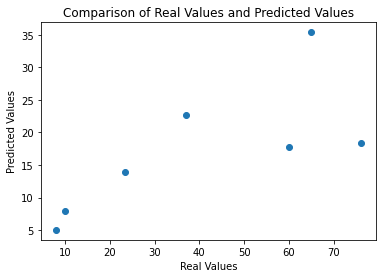

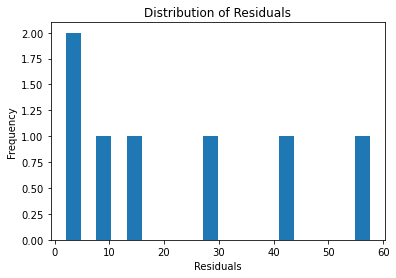

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Real Value  Predicted Value  
0           Juventus    2020        60.0        17.827896  
1           Juventus    2019        65.0        35.380231  
2    Manchester City    2019        37.0        22.613638  
3          Barcelona    2020        76.0        18.374692  
4           Juventus    2020        10.0         7.949823  
5           Juventus    2020         8.0         5.045687  
6              Genoa    2020        23.3        13.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the Bayesian Ridge model
model = BayesianRidge()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Create a table with the test data details, real value, and predicted value
results = X_test.copy()
results['Real Value'] = y_test
results['Predicted Value'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Real Value', 'Predicted Value']]

# Decode categorical variables in the results table
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column] = decoded_values

print(results)


C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error: 560.3160583322832
R^2 Score: 0.13470810481643147


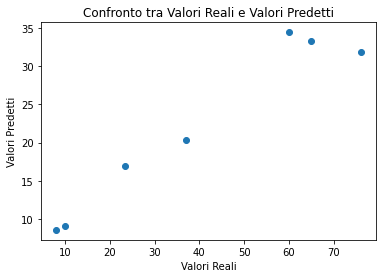

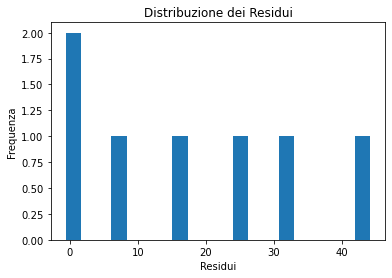

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Valore Reale  Valore Predetto  
0           Juventus    2020          60.0        34.438650  
1           Juventus    2019          65.0        33.308543  
2    Manchester City    2019          37.0        20.329335  
3          Barcelona    2020          76.0        31.909769  
4           Juventus    2020          10.0         9.033331  
5           Juventus    2020           8.0         8.567023  
6              Genoa    2020         

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carica il dataset dai file CSV
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Seleziona le colonne che verranno utilizzate come features (variabili indipendenti)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Seleziona la variabile target (variabile dipendente)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Codifica le variabili categoriche usando OneHotEncoder
categorical_cols = ['Overall_club_name', 'league_destination', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Unisci le features codificate con le altre features
X_train_processed = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# Creazione e addestramento dello scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Creazione e addestramento del modello ANN
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', random_state=42)
model.fit(X_train_scaled, y_train)

# Effettua le previsioni sul set di test
y_pred = model.predict(X_test_scaled)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Grafico dei valori predetti rispetto ai valori reali
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto tra Valori Reali e Valori Predetti')
plt.show()

# Grafico dei residui
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei Residui')
plt.show()

# Creazione di una tabella con i dettagli dei dati di test, il valore reale e il valore predetto
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]

print(results)



C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error: 811.9185714285715
R^2 Score: -0.253839773033123


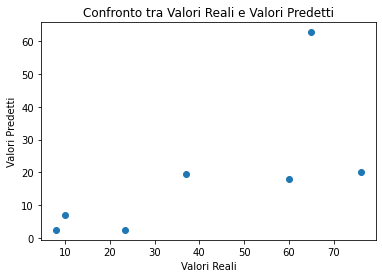

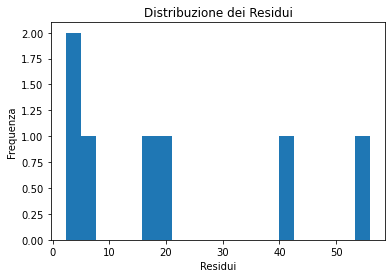

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Valore Reale  Valore Predetto  
0           Juventus    2020          60.0             18.0  
1           Juventus    2019          65.0             62.7  
2    Manchester City    2019          37.0             19.5  
3          Barcelona    2020          76.0             20.0  
4           Juventus    2020          10.0              7.0  
5           Juventus    2020           8.0              2.5  
6              Genoa    2020         

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carica il dataset dai file CSV
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Seleziona le colonne che verranno utilizzate come features (variabili indipendenti)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Seleziona la variabile target (variabile dipendente)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Codifica le variabili categoriche usando OneHotEncoder
categorical_cols = ['Overall_club_name', 'league_destination', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Unisci le features codificate con le altre features
X_train_processed = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test_processed = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# Creazione e addestramento del modello Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_processed, y_train)

# Effettua le previsioni sul set di test
y_pred = model.predict(X_test_processed)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Grafico dei valori predetti rispetto ai valori reali
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto tra Valori Reali e Valori Predetti')
plt.show()

# Grafico dei residui
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei Residui')
plt.show()

# Creazione di una tabella con i dettagli dei dati di test, il valore reale e il valore predetto
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]

print(results)



<ipython-input-9-c5fc399147db>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-9-c5fc399147db>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


Mean Squared Error: 590.6969559904247
R^2 Score: 0.08779111194952072


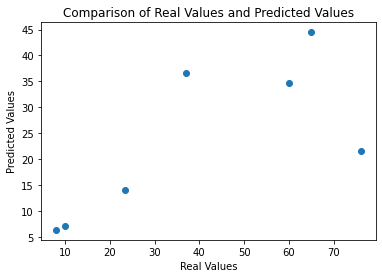

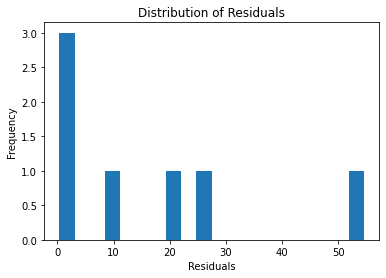

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
###Train con 2012-2021/ test con 2022
# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Select the columns to be used as features (independent variables)
features = [ 'Overall_club_name','Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the GBM model
model = GradientBoostingRegressor(random_state=190)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [10]:
# Crea una tabella con i dettagli dei dati di test, il valore reale e il valore predetto
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]

# Decodifica le variabili categoriche nella tabella dei risultati
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column] = decoded_values

print(results)


         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Valore Reale  Valore Predetto  
0           Juventus    2020          60.0        34.678876  
1           Juventus    2019          65.0        44.472169  
2    Manchester City    2019          37.0        36.622653  
3          Barcelona    2020          76.0        21.468282  
4           Juventus    2020          10.0         7.105132  
5           Juventus    2020           8.0         6.333863  
6              Genoa    2020         

In [11]:
df= results
# Crea la colonna della differenza tra valore predetto e valore reale
df['Differenza'] = df['Valore Predetto'] - df['Valore Reale']

print(df)

         club_name   age       player_name            position  \
0     FC Barcelona  30.0    Miralem Pjanic    Central Midfield   
1  Manchester City  25.0      João Cancelo          Right-Back   
2      Juventus FC  28.0            Danilo          Right-Back   
3      Juventus FC  24.0            Arthur  Defensive Midfield   
4        Genoa CFC  20.0  Manolo Portanova    Central Midfield   
5        Genoa CFC  19.0     Elia Petrelli      Centre-Forward   
6      Juventus FC  19.0    Nicolò Rovella  Defensive Midfield   

  club_involved_name  season  Valore Reale  Valore Predetto  Differenza  
0           Juventus    2020          60.0        34.678876  -25.321124  
1           Juventus    2019          65.0        44.472169  -20.527831  
2    Manchester City    2019          37.0        36.622653   -0.377347  
3          Barcelona    2020          76.0        21.468282  -54.531718  
4           Juventus    2020          10.0         7.105132   -2.894868  
5           Juventus    202

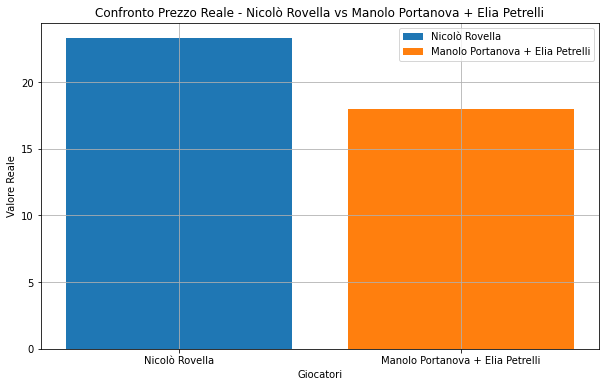

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per i giocatori di interesse
players = ['Nicolò Rovella', 'Manolo Portanova', 'Elia Petrelli']
filtered_df = df[df['player_name'].isin(players)]

# Calcola la somma dei valori reali di Portanova e Petrelli
sum_portanova_petrelli = filtered_df[filtered_df['player_name'] != 'Nicolò Rovella']['Valore Reale'].sum()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Reale'], label='Nicolò Rovella')
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Confronto Prezzo Reale - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)
plt.show()




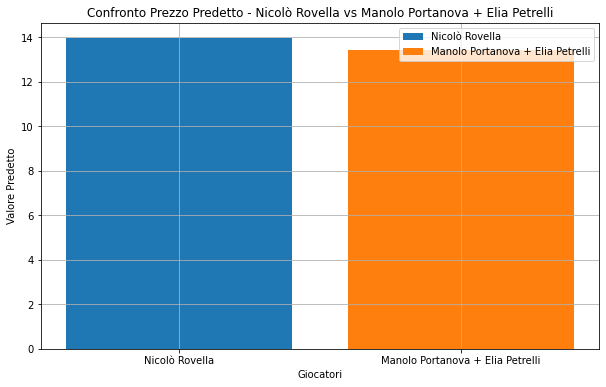

In [13]:
# Filtra i dati per i giocatori di interesse
players = ['Nicolò Rovella', 'Manolo Portanova', 'Elia Petrelli']
filtered_df = df[df['player_name'].isin(players)]

# Calcola la somma dei valori reali di Portanova e Petrelli
sum_portanova_petrelli = filtered_df[filtered_df['player_name'] != 'Nicolò Rovella']['Valore Predetto'].sum()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar('Nicolò Rovella', filtered_df[filtered_df['player_name'] == 'Nicolò Rovella']['Valore Predetto'], label='Nicolò Rovella')
plt.bar('Manolo Portanova + Elia Petrelli', sum_portanova_petrelli, label='Manolo Portanova + Elia Petrelli')
plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Confronto Prezzo Predetto - Nicolò Rovella vs Manolo Portanova + Elia Petrelli')
plt.legend()
plt.grid(True)
plt.show()



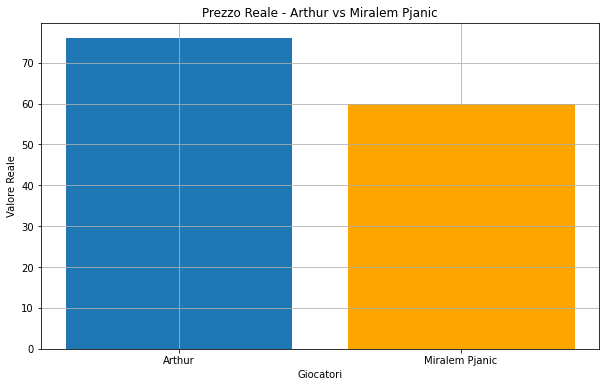

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per i giocatori di interesse
players = ['Arthur', 'Miralem Pjanic']
filtered_df = df[df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Reale'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Reale'].values[0]

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])

# Colora la barra di Miralem Pjanic di arancione
bars[1].set_color('orange')

plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Prezzo Reale - Arthur vs Miralem Pjanic')
plt.grid(True)
plt.show()


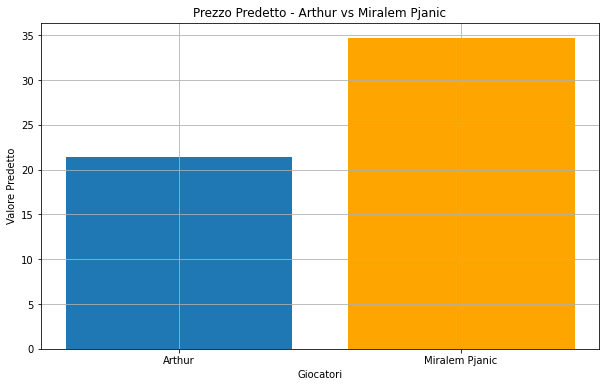

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtra i dati per i giocatori di interesse
players = ['Arthur', 'Miralem Pjanic']
filtered_df = df[df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Arthur']['Valore Predetto'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'Miralem Pjanic']['Valore Predetto'].values[0]

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(['Arthur', 'Miralem Pjanic'], [price_arthur, price_pjanic])

# Colora la barra di Miralem Pjanic di arancione
bars[1].set_color('orange')

plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Prezzo Predetto - Arthur vs Miralem Pjanic')
plt.grid(True)
plt.show()


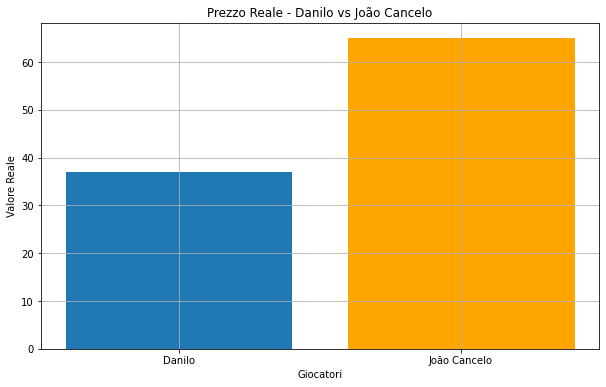

In [16]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per i giocatori di interesse
players = ['Danilo', 'João Cancelo']
filtered_df = df[df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Reale'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Reale'].values[0]

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(['Danilo', 'João Cancelo'], [price_arthur, price_pjanic])

# Colora la barra di Miralem Pjanic di arancione
bars[1].set_color('orange')

plt.xlabel('Giocatori')
plt.ylabel('Valore Reale')
plt.title('Prezzo Reale - Danilo vs João Cancelo')
plt.grid(True)
plt.show()

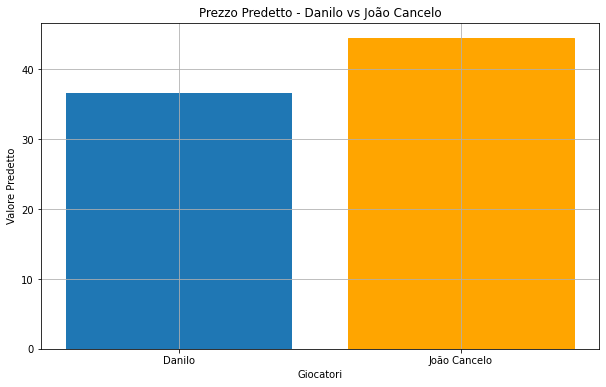

In [17]:
import pandas as pd
import matplotlib.pyplot as plt



# Filtra i dati per i giocatori di interesse
players = ['Danilo', 'João Cancelo']
filtered_df = df[df['player_name'].isin(players)]

# Prendi i valori dei prezzi reali di Arthur e Pjanic
price_arthur = filtered_df[filtered_df['player_name'] == 'Danilo']['Valore Predetto'].values[0]
price_pjanic = filtered_df[filtered_df['player_name'] == 'João Cancelo']['Valore Predetto'].values[0]

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(['Danilo', 'João Cancelo'], [price_arthur, price_pjanic])

# Colora la barra di Miralem Pjanic di arancione
bars[1].set_color('orange')

plt.xlabel('Giocatori')
plt.ylabel('Valore Predetto')
plt.title('Prezzo Predetto - Danilo vs João Cancelo')
plt.grid(True)
plt.show()

In [18]:
import pandas as pd

# Carica il dataset dal tuo CSV
df = pd.read_csv("GBMD.csv")

# Calcola la somma della colonna "Differenza" per ogni "club_name"
sum_differences = df.groupby("club_name")["Differenza"].sum()

# Ordina i risultati in ordine decrescente
sorted_sum_differences = sum_differences.sort_values(ascending=False)

# Stampa i primi 20 risultati
print("Primi 20 risultati:")
print(sorted_sum_differences.head(20))

# Stampa i peggiori 20 risultati
print("Peggiori 20 risultati:")
print(sorted_sum_differences.tail(20))


Primi 20 risultati:
club_name
Paris Saint-Germain      103.403934
Arsenal FC                58.186849
Atalanta BC               44.257237
Eintracht Frankfurt       44.214487
Swansea City              37.728664
FK Rostov                 37.181040
Tottenham Hotspur         35.607052
Juventus FC               34.651484
Torino FC                 30.129802
Krylya Sovetov Samara     29.533235
SM Caen                   28.683726
AS Saint-Étienne          28.248408
Feyenoord Rotterdam       22.032175
Vitória Guimarães SC      21.645716
Real Valladolid CF        20.976560
SS Lazio                  20.029109
RC Strasbourg Alsace      19.220263
Hellas Verona             19.084866
VfB Stuttgart             18.009112
Norwich City              17.974932
Name: Differenza, dtype: float64
Peggiori 20 risultati:
club_name
West Ham United         -29.169396
Athletic Bilbao         -30.582461
TSG 1899 Hoffenheim     -31.094445
SSC Napoli              -36.830186
RB Leipzig              -39.257661
Olympique

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica il dataset di addestramento e test
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Rest.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/Juve.csv")

# Seleziona le feature che desideri utilizzare per la regressione
features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi il dataset di addestramento in caratteristiche e variabile target
X_train = train_data[features]
y_train = train_data[target]

# Dividi il dataset di test in caratteristiche e variabile target
X_test = test_data[features]
y_test = test_data[target]

# Codifica le caratteristiche categoriche
cat_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season','league_destination']
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(train_data[cat_features]))
X_train_encoded.columns = encoder.get_feature_names(cat_features)

X_test_encoded = pd.DataFrame(encoder.transform(test_data[cat_features]))
X_test_encoded.columns = encoder.get_feature_names(cat_features)

# Concatena le caratteristiche codificate con quelle numeriche per il set di addestramento
X_train = pd.concat([X_train, X_train_encoded], axis=1)

# Concatena le caratteristiche codificate con quelle numeriche per il set di test
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Crea il modello XGBoost
xgb_model = xgb.XGBRegressor()

# Definisci i parametri per la griglia di ricerca
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Crea l'oggetto per la griglia di ricerca
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Esegui la griglia di ricerca per trovare i migliori parametri
grid_search.fit(X_train, y_train)

# Ottieni i parametri ottimali
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i parametri ottimali
xgb_model = xgb.XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

# Calcola le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Log Error:", msle)
print("Explained Variance Score:", evs)
print("R-squared:", r2)